# Predicting Housing Prices (with Ames Housing Data)
## Part 1 - EDA, Data Cleaning and Preprocessing

## Problem Statement
This projects will examine a housing dataset containing information on properties sold between the year 2006 to 2010 from the city of Ames, USA. The aim of this project will be to:
1. Create a model that predicts the saleprice given a set of features of the property
2. Find out what features add the most value to a home and the features that hurt the value of a home the most
3. What are things that potential home sellers can do to improve the value of their properties

These information will be useful for any potential home buyers and home sellers.

In order to find the achieve the aim specified above, I will train multiple linear regression models on the housing dataset. I will look at the error statistics and measure it against the a baseline model to create a model which gives good results with the information available. 

### Information on the dataset
The Ames housing dataset contains information for 2051 properties, each with 80 features and 1 label (saleprice). The data dictionary can be found in the README file.

### Contents:
- [Importing Libraries and Datasets](#Importing-Libraries-and-Datasets)
- [Data Cleaning and EDA](#Data-Cleaning-and-EDA)
- [1. Feature with High Percent Missing Values](#1.-Feature-with-High-Percent-Missing-Values)
- [2. Numerical Features Exploration](#'2.-Numerical-Features-Exploration')
- [3. Categorical Features Exploration](#3.-Categorical-Features-Exploration)
- [Preprocessing Datasets](#Preprocessing-Datasets)
- [1. Null Values](#1.-Null-Values)
- [2. Outliers](#2.-Outliers)
- [3. Categorical Data](#3.-Categorical-Data)
- [4. Preprocess Test Dataset](#4.-Preprocess-Test-Dataset)

# Importing Libraries and Datasets

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder

In [2]:
# reading the train and test dataset

train_csv = '../datasets/train.csv'
test_csv = '../datasets/test.csv'

train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

In [3]:
# check whether the train dataset has been read correctly
train.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [4]:
# check the number of rows and cols in train dataset
train.shape

(2051, 81)

In [5]:
# check whether the test dataset has been read correctly
test.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [6]:
# check the number of rows and cols in test dataset
test.shape

(879, 80)

In [7]:
# make a copy of the train dataset to work on
df_train = train.copy()

# change the column names so that it can be more easily written
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')

# check the column names have been transformed corrected
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
# Quickly look through the dataset, looking at attributes such as the datatype and null count
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

A quick look at the above suggests that there are many features with null values. We will first explore these features with null values. 

There are also many features that are of numerical type and of object type. We will explore these to check if any of these have been misclassified.

# Data Cleaning and EDA

## 1. Feature with High Percent Missing Values

There seem to have many features with **high percent of missing values** (null for categorical variables and zero for numerical variables). If the percent of missing value is too high, it indicates that **only a very small percentage of properties have the feature* or have provided information for the feature**. Keeping such features **will not be useful for the understanding of the sale price of the properties and also not useful for the model**.

\* It should be noted that according to the data dictionary, there are deliberate null values which indicates that there is no such feature.

### Features with High Percentage of Null

In [9]:
# find all features with null values
null_cols = [col_name for col_name in df_train.columns if df_train[col_name].isnull().any()]

# creating a new dataframe with the features with null values and saleprice
# saleprice is added so that the features relationship with it can be explored
null_cols.append('saleprice')
df_train_null = df_train[null_cols].copy()

# percentage of null values of all features with null values (sorted)
(df_train_null.isnull().sum()/len(df_train_null)).sort_values(ascending=False)

pool_qc           0.995612
misc_feature      0.968308
alley             0.931741
fence             0.804973
fireplace_qu      0.487567
lot_frontage      0.160897
garage_finish     0.055583
garage_yr_blt     0.055583
garage_qual       0.055583
garage_cond       0.055583
garage_type       0.055095
bsmt_exposure     0.028279
bsmtfin_type_2    0.027304
bsmtfin_type_1    0.026816
bsmt_qual         0.026816
bsmt_cond         0.026816
mas_vnr_type      0.010726
mas_vnr_area      0.010726
bsmt_full_bath    0.000975
bsmt_half_bath    0.000975
bsmtfin_sf_1      0.000488
bsmtfin_sf_2      0.000488
bsmt_unf_sf       0.000488
total_bsmt_sf     0.000488
garage_cars       0.000488
garage_area       0.000488
saleprice         0.000000
dtype: float64

From the above, we can see that the features: pool_qc, misc_feature, alley, fence, fireplace_qu, have a **sizeable number of null values**. 

In [10]:
# define a function that makes the column names nicer to be printed on plots 
def print_col(col_name):
    
    '''
    The functions removes the _ and capitalizes each word in the column name
    '''
    
    new_name = col_name.split('_')
    for i in range(len(new_name)):
        new_name[i] = new_name[i].capitalize()
    new_name = ' '.join(new_name)
    
    return new_name

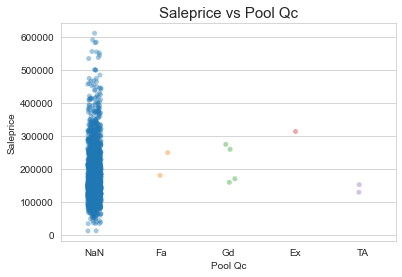

99.56% of the pool_qc values are null values


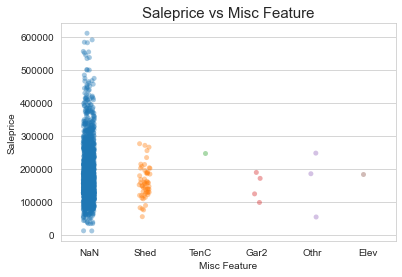

96.83% of the misc_feature values are null values


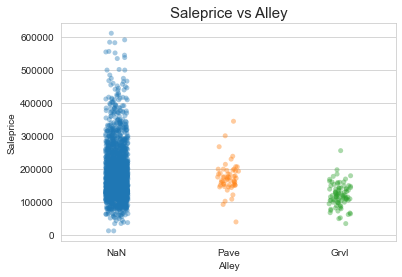

93.17% of the alley values are null values


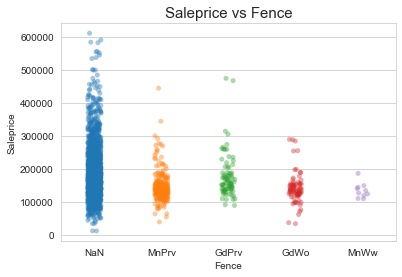

80.50% of the fence values are null values


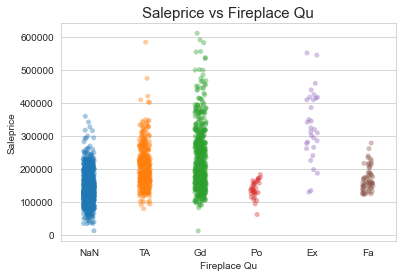

48.76% of the fireplace_qu values are null values


In [11]:
# loop through the 5 features chosen
for col in ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']:
    
    # to display the null values on the plot, i filled np.nan values with the string 'NaN'
    df_train_null[col] = df_train_null[col].fillna('NaN')
    
    # plotting a stripplot of the saleprice vs the feature.
    # stripplot is used as it not only shows the distribution, but the density of the data for each value can also be seen
    sns.stripplot(x=df_train_null[col], y=df_train_null['saleprice'], data=df_train_null, alpha=0.4)
    plt.title(f'Saleprice vs {print_col(col)}', fontsize = 15)
    plt.xlabel(print_col(col))
    plt.ylabel('Saleprice')
    plt.show()
    
    # print the percentage of null values in the feature
    num_null = len(df_train_null[df_train_null[col]=='NaN'])
    print(f'{(num_null/2051)*100:.2f}% of the {col} values are null values')

#### Drop features - High percentage of null
The features 'pool_qc', 'misc_feature', 'alley' have:
1. a **huge number of null-values** (more than 93% missing data) and 
2. from the distribution of stripplot, regardless of the value (whether it is is NaN or there is available values), they **do not heavily impact the sale price**. 

The features 'fence' has over **80% missing value** and similary, from the distribution of stripplot, it **does not impact the sale price either**.

Hence, these 4 features will be dropped from the dataframe.

For fireplace_qu features, the variable seems to have some impact on the saleprice and around half of the dataset contains non-null values. This feature will be retained.

In [12]:
# initialize a dictionary to keep track of the columns that has been dropped and the reasons
features_to_be_dropped = {}

# define a function that drops the list of columns from df_train and an additional dataframe (optional
# it also keeps track of the list of columns dropped in the dictionary initialized above
def drop_features(reason, list_of_columns, df=None):
    
    '''
    This function helps to drop the columns and keep track of the columns in a dictionary

    Pass in:
    1. The reason for dropping the columns
    2. A list containing all the column headers
    3. (Optional) - An additional dataframe, the columns will be dropped from the additional dataframe as well.
    '''

    df_train.drop(columns=list_of_columns, inplace=True)
    if isinstance(df, pd.DataFrame):
        df.drop(columns=list_of_columns, inplace=True)

    features_to_be_dropped[reason] = list_of_columns

In [13]:
# drop features identified above
drop_features('high_null_pct', ['pool_qc', 'misc_feature', 'alley', 'fence'], df=df_train_null)

### Features with High Percentage of Zero

Given that there are a lot of null values, it suggests that some features are missing. Hence, numerical attribute of similar feature might also have missing values in the form of zeroes. 

(i.e. pool_qc dropped above suggests that a large number of properties do not have pool. This may be also reflected in pool_area as zeroes)

In [14]:
# find all numerical features
numerical_cols = [col_name for col_name in df_train.columns if df_train[col_name].dtype in ['int64', 'float64']]

# create a new dataframe with all numerical features
# do not need to append saleprice as saleprice is a numerical features and is already in the dataset
df_train_num = df_train[numerical_cols].copy()

# create a dataframe with all the features and the number of zeroes it contains
num_zeroes = pd.DataFrame(list({col_name: len(df_train_num[df_train_num[col_name] == 0]) for col_name in df_train_num.columns}.items()), columns=['feature', 'num_zeroes'])
num_zeroes = num_zeroes.sort_values('num_zeroes', ascending=False).reset_index(drop=True)

# add a new column that shows the percentage of zeroes for each feature
num_zeroes['pct_zeroes'] = (num_zeroes['num_zeroes']/2051) * 100

# print all numerical features containing zeroes
num_zeroes[num_zeroes['num_zeroes'] != 0]

,feature,num_zeroes,pct_zeroes
0,pool_area,2042,99.561190
1,3ssn_porch,2025,98.732326
2,low_qual_fin_sf,2018,98.391029
3,misc_val,1986,96.830814
4,bsmt_half_bath,1923,93.759142
5,screen_porch,1870,91.175037
6,bsmtfin_sf_2,1803,87.908337
7,enclosed_porch,1724,84.056558
8,half_bath,1308,63.773769
9,mas_vnr_area,1216,59.288152


There are many columns with high percentage (>30%) of the values = 0. Shall take a closer look at these columns:

In [15]:
# find all features with more than 30% zeroes
cols_with_zeroes = list(num_zeroes[num_zeroes['pct_zeroes'] > 30]['feature'])

In [16]:
# def function to display a scatterplot of saleprice vs a chosen feature
# it will also provide the correlation of the chosen feature with saleprice
def num_col_scatterplot_corr(col_name):
    
    sns.scatterplot(x=df_train_num[col_name], y=df_train_num['saleprice'])
    plt.title(f'Saleprice vs {print_col(col_name)}', fontsize=15)
    plt.ylabel('Saleprice')
    plt.xlabel(f'{print_col(col_name)}')
    plt.show()
    
    
    print(f'Statistics for {print_col(col_name)}')
    print(f'------------------------------------')
    corr = df_train_num[['saleprice', col_name]].corr().iloc[0, 1]
    print(f'Correlation is {corr:.4g}')

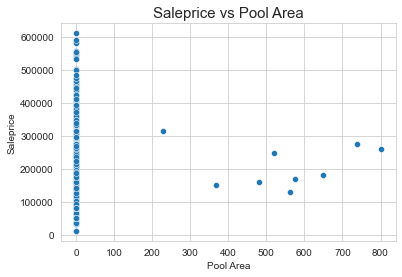

Statistics for Pool Area
------------------------------------
Correlation is 0.02311
Percentage of zero is 99.56%


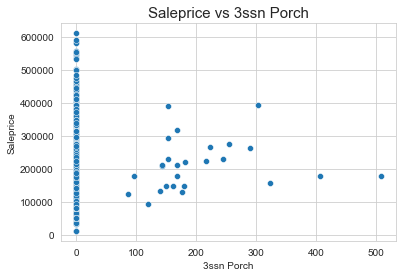

Statistics for 3ssn Porch
------------------------------------
Correlation is 0.04873
Percentage of zero is 98.73%


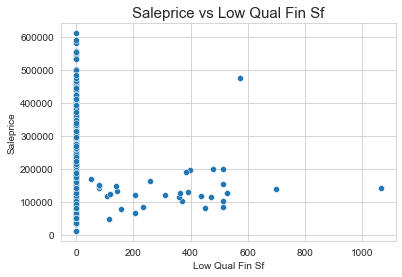

Statistics for Low Qual Fin Sf
------------------------------------
Correlation is -0.04159
Percentage of zero is 98.39%


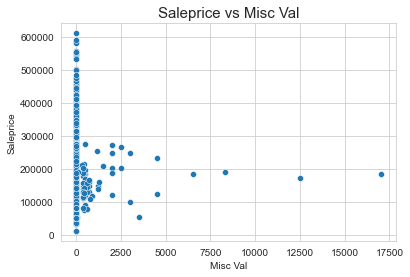

Statistics for Misc Val
------------------------------------
Correlation is -0.007375
Percentage of zero is 96.83%


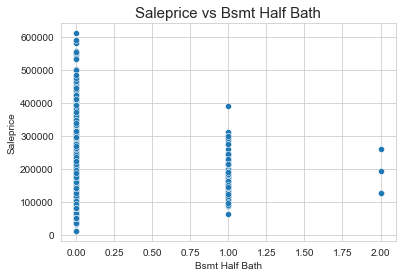

Statistics for Bsmt Half Bath
------------------------------------
Correlation is -0.04533
Percentage of zero is 93.76%


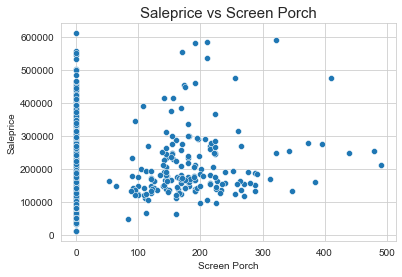

Statistics for Screen Porch
------------------------------------
Correlation is 0.1346
Percentage of zero is 91.18%


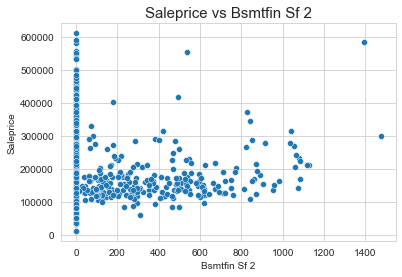

Statistics for Bsmtfin Sf 2
------------------------------------
Correlation is 0.01626
Percentage of zero is 87.91%


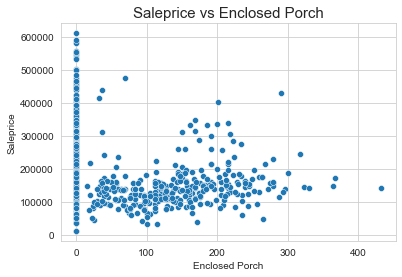

Statistics for Enclosed Porch
------------------------------------
Correlation is -0.1357
Percentage of zero is 84.06%


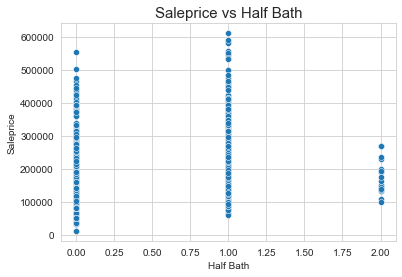

Statistics for Half Bath
------------------------------------
Correlation is 0.283
Percentage of zero is 63.77%


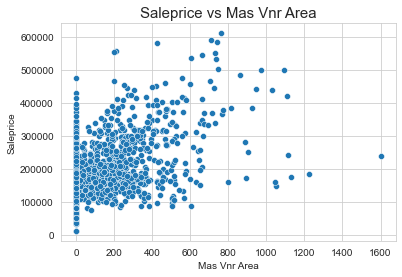

Statistics for Mas Vnr Area
------------------------------------
Correlation is 0.5122
Percentage of zero is 59.29%


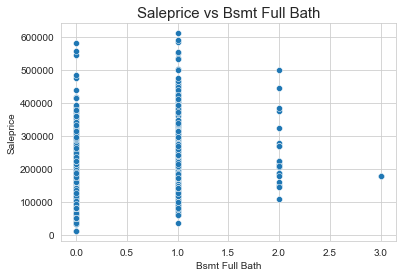

Statistics for Bsmt Full Bath
------------------------------------
Correlation is 0.2837
Percentage of zero is 58.51%


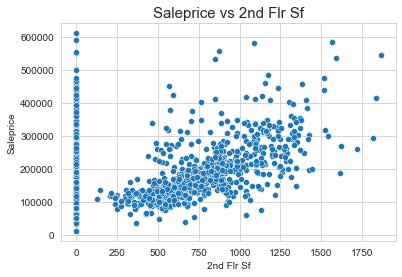

Statistics for 2nd Flr Sf
------------------------------------
Correlation is 0.2485
Percentage of zero is 58.07%


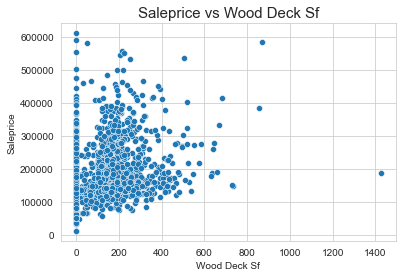

Statistics for Wood Deck Sf
------------------------------------
Correlation is 0.3265
Percentage of zero is 52.41%


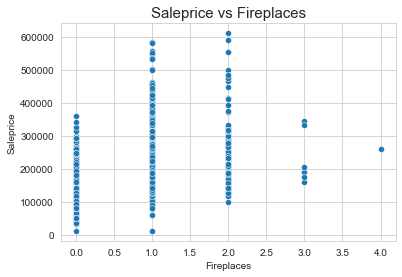

Statistics for Fireplaces
------------------------------------
Correlation is 0.4711
Percentage of zero is 48.76%


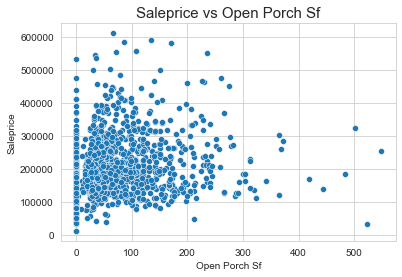

Statistics for Open Porch Sf
------------------------------------
Correlation is 0.3335
Percentage of zero is 44.47%


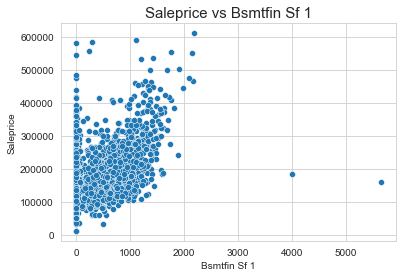

Statistics for Bsmtfin Sf 1
------------------------------------
Correlation is 0.4235
Percentage of zero is 32.03%


In [17]:
# plot the scatterplot of all features with more than 30% zeroes
for col_name in cols_with_zeroes:
    num_col_scatterplot_corr(col_name)
    
    # prints the percentage of zeroes for the feature
    pct_zero = num_zeroes.loc[num_zeroes['feature'] == col_name].iloc[0, 2]
    print(f'Percentage of zero is {pct_zero:.2f}%')

#### Drop features - High percentage of zero
The features 'bsmtfin_sf_2', 'bsmt_half_bath', 'low_qual_fin_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', ' pool_area', ' misc_val' have:
1. **high percentage of zeroes** and 
2. the distribution of the scatterplots & their correlations show that they **do not contribute to the understanding of saleprice** of the properties.

Additionally, the id column is only useful for **identifying the houses** but **does not impact the saleprice** of the properties.

Hence, these features will be dropped from the dataframe.

\* From the plots, some outliers can also be identified. However, I will address these in a later section.

In [18]:
# drop features identified above
features_to_drop = 'bsmtfin_sf_2,bsmt_half_bath,low_qual_fin_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val'.split(',')
drop_features('high_zero_pct', features_to_drop, df=df_train_num)
drop_features('IDs', 'id', df=df_train_num)

#### Related Feature - 'bsmtfin_type_2'
As 'bsmtfin_sf_2' was dropped, there is a feature that seems highly related to it - 'bsmtfin_type_2'. 

In [19]:
# the count of values in bsmtfin_type_2
df_train[['bsmtfin_type_2']].value_counts()

bsmtfin_type_2
Unf               1749
Rec                 80
LwQ                 60
BLQ                 48
ALQ                 35
GLQ                 23
dtype: int64

In [20]:
# percentage of 'Unf' value in bsmtfin_type_2
len(df_train[df_train['bsmtfin_type_2'] == 'Unf'])/len(df_train)

0.8527547537786445

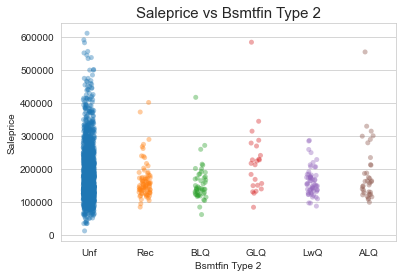

In [21]:
# plot the stripplot of saleprice against bsmtfin_type_2
sns.stripplot(x=df_train['bsmtfin_type_2'], y=df_train['saleprice'], alpha=0.4)
plt.title(f"Saleprice vs {print_col('bsmtfin_type_2')}", fontsize = 15)
plt.ylabel('Saleprice')
plt.xlabel(f"{print_col('bsmtfin_type_2')}")
plt.show()

Similarly, for the feature 'bsmtfin_type_2', 85% of the dataset is unfinished and from the stripplot above, regardless of the value, they do not heavily impact the sale price. Hence, this will be dropped as well.

In [22]:
# drop 'bsmtfin_type_2'
drop_features('high_pct_of_single_value', ['bsmtfin_type_2'])

## 2. Numerical Features Exploration

From reading the data dictionary, it seemed to me that the sum of 1st floor square feet and 2nd floor square feet should be very similar to general living area. 

That shall be explored below.

In [23]:
# create a new variable that is the sum of '1st_flr_sf' and '2nd_flr_sf'
total_flr_sf = df_train_num['1st_flr_sf'] + df_train_num['2nd_flr_sf']

# check the correlation between the total square feet of 1st and 2nd floor vs 'gr_liv_area'
np.corrcoef(total_flr_sf, df_train_num['gr_liv_area'])[0, 1]

0.9947797403378804

I will also explore the numerical features using correlation to identify:
1. Collinearity
2. Features with low correlation to saleprice

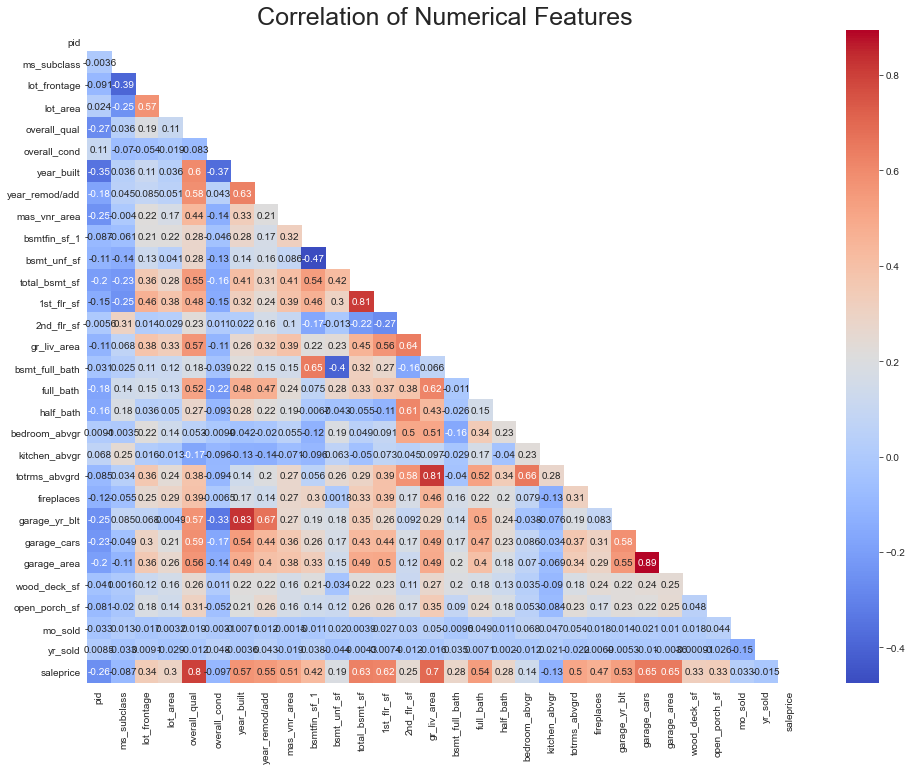

In [24]:
# explore the correlation of all numerical features using a visual heatmap
num_corr = df_train_num.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(num_corr, mask=np.triu(num_corr), cmap='coolwarm', annot=True)
plt.title('Correlation of Numerical Features', fontsize = 25)
plt.show()

The analysis between the sum of 1st_flr_sf and 2nd_flr_sf and gr_liv_area shows that the sum has **extremely high correlation with gr_liv_area**. As such, the value from gr_liv_area should be sufficient and '1st_flr_sf' and '2nd_flr_sq' will be dropped.

From the correlation heatmap, a few observations can be drawn:
1. After '1st_flr_sf' is dropped, there are 3 column pairs which are shown to have  **high pairwise collinearity**. One feature from each pair should be dropped to prevent this, the pairs are:

    1. 'garage_yr_blt' and 'year_built'
    2. 'totrms_abvgrd','gr_liv_area'
    3. 'garage_area','garage_cars'
2. The following columns have **low correlation with sale price**: ms_subclass, overall_cond, bsmt_unf_sf, bsmt_full_bath, half_bath, bedroom_abv_gr, kitchen_abvgr, mo_sold, yr_sold. For mo_sold and yr_sold, I will also create a new variable of combining the year and month sold to see if there is any correlation. These columns will be investigated further later on.
3. It can be observed that there are **a few features that have high correlation with saleprice**, these include: overall quality, general living area, garage area, total basement square feet, etc. As such, a **regularized linear model may be able to predict the housing price with an acceptable degree accuracy**. 

In [25]:
# drop the features identified above
drop_features('sum_high_corr_to_gr_liv_area', ['1st_flr_sf', '2nd_flr_sf'], df=df_train_num)

# creating a list of feature pairs that have high pairwise collinearity
correlated_num_cols = [['garage_yr_blt', 'year_built'], ['totrms_abvgrd', 'gr_liv_area'], ['garage_area', 'garage_cars']]

# creating a list of features with low correlation with saleprice
low_corr_w_saleprice = 'ms_subclass, overall_cond, bsmt_unf_sf, bsmt_full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, mo_sold, yr_sold'.replace(' ', '').split(',')

### Features with High Pairwise Collinearity

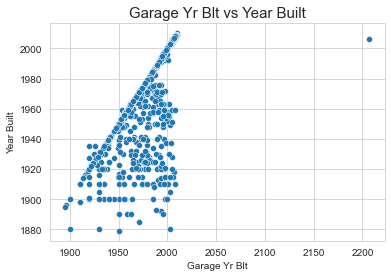

Correlation between Garage Yr Blt and Year Built is 0.8253


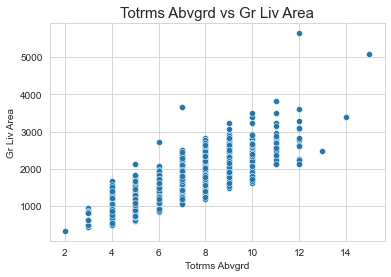

Correlation between Totrms Abvgrd and Gr Liv Area is 0.8133


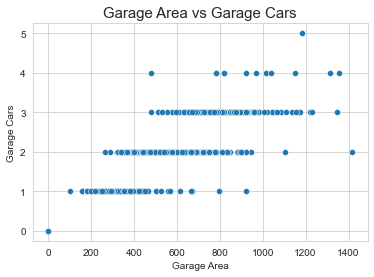

Correlation between Garage Area and Garage Cars is 0.8932


In [26]:
# plot a scatterplot for each feature pair with high pairwise collinearity
for col1, col2 in correlated_num_cols:
    
    sns.scatterplot(x=df_train_num[col1], y=df_train_num[col2])
    plt.title(f'{print_col(col1)} vs {print_col(col2)}', fontsize=15)
    plt.xlabel(f'{print_col(col1)}')
    plt.ylabel(f'{print_col(col2)}')
    plt.show()
    
    #prints the numerical correlation between the feature pair
    corr = df_train_num[[col1, col2]].corr().iloc[0, 1]
    print(f'Correlation between {print_col(col1)} and {print_col(col2)} is {corr:.4g}')

From the above scatterplots, the pairs do look highly correlated. One feature shall be dropped from each pair, preferably the column that has lower correlation with saleprice.

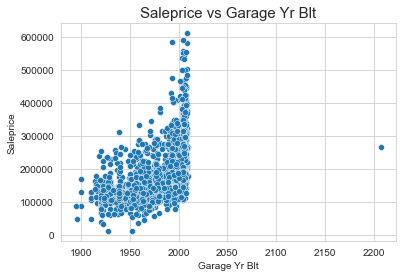

Statistics for Garage Yr Blt
------------------------------------
Correlation is 0.5339


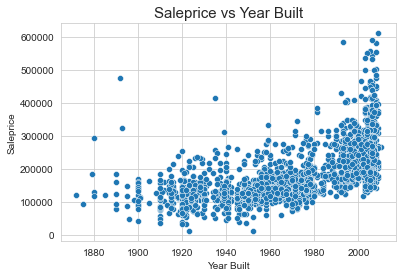

Statistics for Year Built
------------------------------------
Correlation is 0.5718


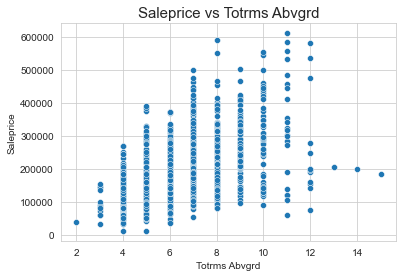

Statistics for Totrms Abvgrd
------------------------------------
Correlation is 0.504


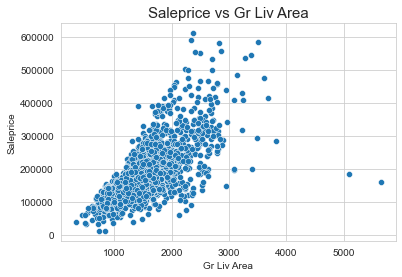

Statistics for Gr Liv Area
------------------------------------
Correlation is 0.697


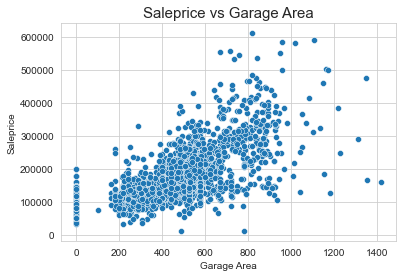

Statistics for Garage Area
------------------------------------
Correlation is 0.6503


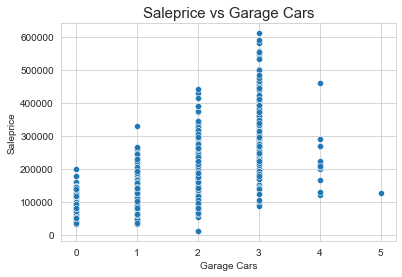

Statistics for Garage Cars
------------------------------------
Correlation is 0.6482


In [27]:
# for each of the features with high pairwise collinearity, print a scatterplot of saleprice against the feature
# this will help to determine which feature is less useful in predicting saleprice
for line in correlated_num_cols:
    for col in line:
        num_col_scatterplot_corr(col)

#### Drop features - High pairwise collinearity
The features garage_yr_blt, totrms_abvgrd, garage_cars will be dropped between the pairs identified with **high pairwise colinearity**. The reason the above features are chosen is because either:
1. **Lower correlation with saleprice** and/or 
2. **Fewer non-zero or non-null values**. 

In [28]:
# drop features identified above
features_to_drop = 'garage_yr_blt, totrms_abvgrd, garage_cars'.replace(' ', '').split(',')
drop_features('high_pairwise_collinearity', features_to_drop, df=df_train_num)

### Exploring Polynomial Features

Before exploring and dropping features with low correlation to saleprice, we will try polynomial features to check if any interaction terms can be useful.

In [29]:
# to use polynomial features, there has to be no null values

# find the features with null values
null = [col_name for col_name in df_train_num.columns if df_train_num[col_name].isnull().any()]

# print out the features and the number of null values it has|
df_train_num[null].isnull().sum()

lot_frontage      330
mas_vnr_area       22
bsmtfin_sf_1        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
garage_area         1
dtype: int64

In [30]:
# as i will be comparing the correlation of polynomial features to saleprice,
# i will not include saleprice in the creation of polynomial features
columns_to_drop = ['saleprice']

# to quickly fill in the null value, i will use SimpleImputer
imputer = SimpleImputer()
imputed = imputer.fit_transform(df_train_num.drop(columns=columns_to_drop))

# the output imputed is an array, the following change it back into a dataframe
imputed_train_num = pd.DataFrame(imputed, columns=df_train_num.drop(columns=columns_to_drop).columns)

# check if the imputed dataframe has been created correctly
imputed_train_num.head()

,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,fireplaces,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold
0,533352170.0,60.0,69.0552,13517.0,6.0,8.0,1976.0,2005.0,289.0,533.0,...,2.0,1.0,3.0,1.0,0.0,475.0,0.0,44.0,3.0,2010.0
1,531379050.0,60.0,43.0000,11492.0,7.0,5.0,1996.0,1997.0,132.0,637.0,...,2.0,1.0,4.0,1.0,1.0,559.0,0.0,74.0,4.0,2009.0
2,535304180.0,20.0,68.0000,7922.0,5.0,7.0,1953.0,2007.0,0.0,731.0,...,1.0,0.0,3.0,1.0,0.0,246.0,0.0,52.0,1.0,2010.0
3,916386060.0,60.0,73.0000,9802.0,5.0,5.0,2006.0,2007.0,0.0,0.0,...,2.0,1.0,3.0,1.0,0.0,400.0,100.0,0.0,4.0,2010.0
4,906425045.0,50.0,82.0000,14235.0,6.0,8.0,1900.0,1993.0,0.0,0.0,...,2.0,0.0,3.0,1.0,0.0,484.0,0.0,59.0,3.0,2010.0


In [31]:
# instantiating PolynomialFeatures and creating an array of polynomial features
poly = PolynomialFeatures(include_bias=False, interaction_only=True)
poly_array = poly.fit_transform(imputed_train_num)

# turn the array of polynomial features back into a dataframe
df_train_num_poly = pd.DataFrame(poly_array, columns=poly.get_feature_names(imputed_train_num.columns))

# add saleprice to the dataframe containing all the polynomial features
df_train_num_poly['saleprice'] = df_train['saleprice']

# find correlation of all polynomial features to saleprice
df_train_num_poly_corr_saleprice = df_train_num_poly.corr()[['saleprice']]

# sort the dataframe by correlation with saleprice (in descending order)
df_train_num_poly_corr_saleprice_sorted = df_train_num_poly_corr_saleprice.sort_values('saleprice', ascending=False)

# reset the index so that the feature is no longer the index
df_train_num_poly_corr_saleprice_sorted.reset_index(inplace=True)

# rename the column from 'index' and 'saleprice' to 'feature' and 'correlation'
df_train_num_poly_corr_saleprice_sorted.columns = ['feature', 'correlation']

# check the dataframe is correct
df_train_num_poly_corr_saleprice_sorted.head()

,feature,correlation
0,saleprice,1.000000
1,overall_qual gr_liv_area,0.837152
2,overall_qual garage_area,0.813508
3,overall_qual year_built,0.806902
4,overall_qual year_remod/add,0.804740


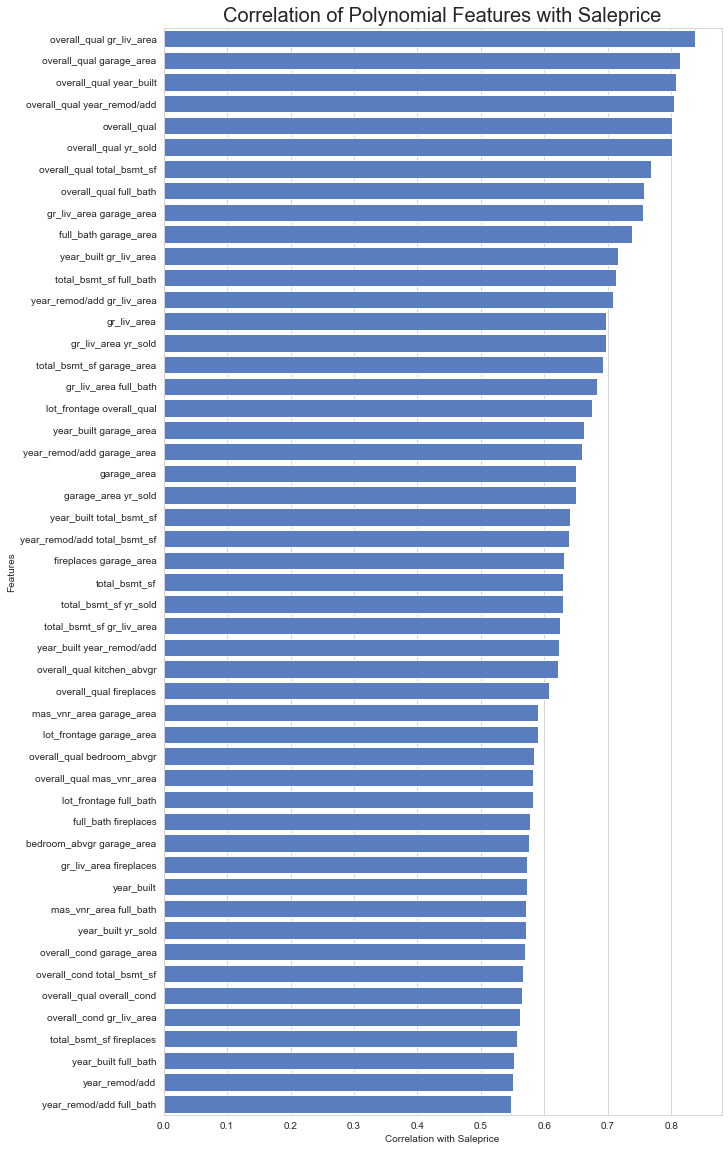

In [32]:
# as there are 300 polynomial features, i will only look at the top 50 features
top_50_poly_features = df_train_num_poly_corr_saleprice_sorted[1:51]

# plot a barplot of correlation of the top 50 polynomial features with saleprice
plt.figure(figsize = (10, 20))
sns.set_color_codes("muted")
sns.barplot(x=top_50_poly_features["correlation"], y=top_50_poly_features['feature'], color="b")
plt.title('Correlation of Polynomial Features with Saleprice', fontsize = 20)
plt.ylabel('Features')
plt.xlabel('Correlation with Saleprice')
plt.show()

#### Observations from Polynomial Features
The interaction feature of year_built and year_remod/add achieved a higher correlation with saleprice, as compared to when they are used separately. This interaction term also make sense logically as year_built and year_remod/add have **decently high correlation to each other of 0.63** and using interaction term allow both information to be present while removing the collinearity. 

This interaction feature will be created and added while the two features used to create it will be removed.

Other observations:
1. Most of the interaction features that has high correlation are because they are interaction features containing with **feature that already has high correlation with saleprice** by itself (i.e. overall_qual, gr_liv_area, garage_area).
2. Some interaction feature **did not make logical sense** (i.e. total basement square feet x number of full bath created an interaction term with higher correlation). As the relationship cannot be logically understood, I have decided to not include it for now.

In [33]:
# create the interaction feature
df_train_num['year_built_x_year_remod'] = df_train_num['year_built'] * df_train_num['year_remod/add']
df_train['year_built_x_year_remod'] = df_train['year_built'] * df_train['year_remod/add']

# drop the features used to create the interaction feature to prevent multicollinearity
drop_features('interaction_feature', ['year_built', 'year_remod/add'], df_train_num)

### Features with Low Correlation with Saleprice

After polynomial features between the numerical features have been explored, I will move back to exploring the features with low correlation with saleprice. The low correlation may likely signal that the feature does not help in understanding of the saleprice.

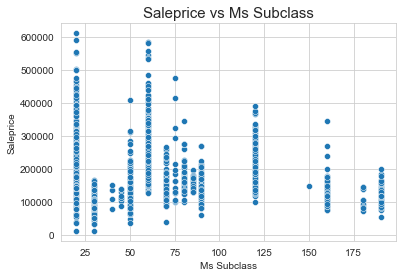

Statistics for Ms Subclass
------------------------------------
Correlation is -0.08734


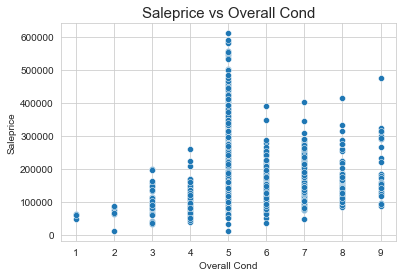

Statistics for Overall Cond
------------------------------------
Correlation is -0.09702


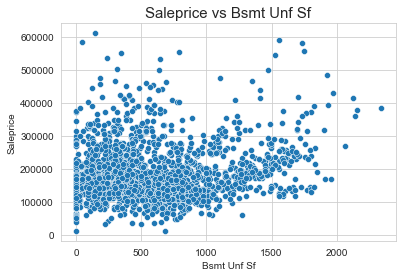

Statistics for Bsmt Unf Sf
------------------------------------
Correlation is 0.1902


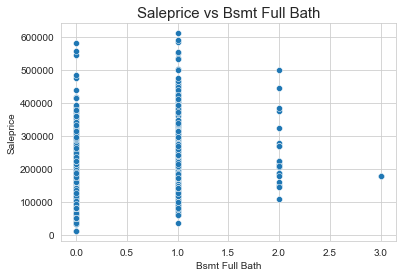

Statistics for Bsmt Full Bath
------------------------------------
Correlation is 0.2837


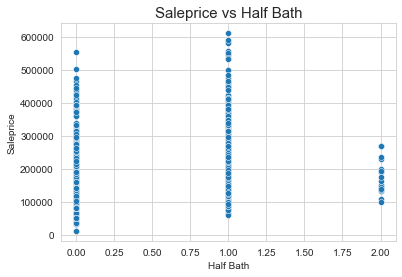

Statistics for Half Bath
------------------------------------
Correlation is 0.283


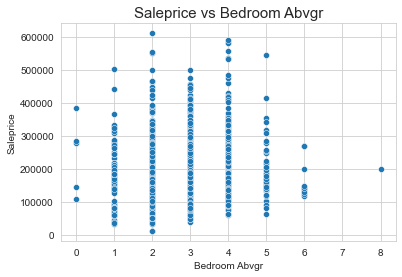

Statistics for Bedroom Abvgr
------------------------------------
Correlation is 0.1371


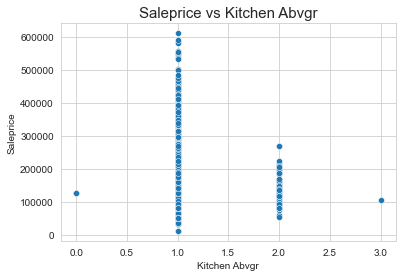

Statistics for Kitchen Abvgr
------------------------------------
Correlation is -0.1254


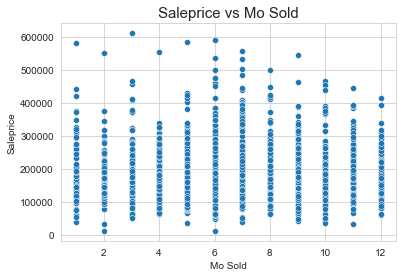

Statistics for Mo Sold
------------------------------------
Correlation is 0.03274


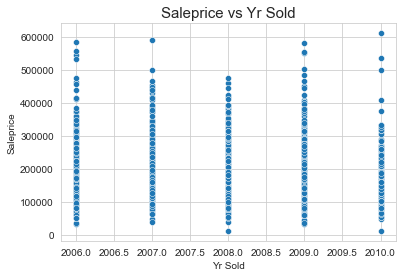

Statistics for Yr Sold
------------------------------------
Correlation is -0.0152


In [34]:
# print the scatterplot and correlation of all features identified to have low correlation with saleprice
for col in low_corr_w_saleprice:
    num_col_scatterplot_corr(col)

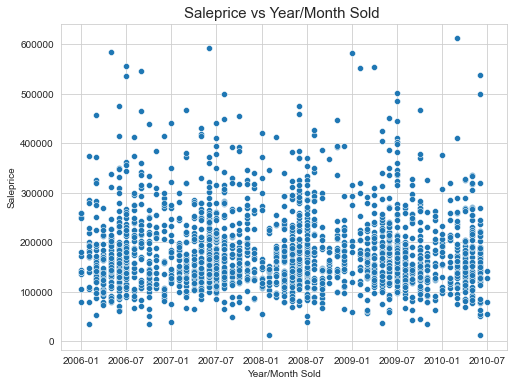

In [35]:
# create a datatime object with yr_sold and mo_sold
yr_mo_sold = df_train_num['yr_sold'].astype(str) + '-' + df_train_num['mo_sold'].astype(str)
yr_mo_sold_dt = pd.to_datetime(yr_mo_sold)

# plot scatterplot of saleprice against year/month sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x=yr_mo_sold_dt, y=df_train_num['saleprice'])
plt.title(f'Saleprice vs Year/Month Sold ', fontsize=15)
plt.ylabel('Saleprice')
plt.xlabel('Year/Month Sold')
plt.show()

#### Drop features - Low correlation
The following features bsmt_unf_sf, bsmt_full_bath, bedroom_abvgr, yr_sold and mo_sold, have:
1. **low correlation with saleprice** and 
2. from the distribution of the scatterplots, there are **no observable relationship with and do not contribute to understanding of saleprice**:

From the analysis of combining yr_sold and mo_sold, it did not produce any meaningful result. These two features will be dropped.

ms_subclass should be used as a **nominal categorical** - there is **no linear relationship** between its value and saleprice, however, from the scatterplot, it is evident that the **values indeed affect saleprice**

A few other features have very low correlations, they are: overall_cond, half bath, kitchen_abvgr. However, from the scatterplots, there **seem to exist some observable relationship with saleprice**. I will keep them for now, and may be removed by lasso or ridge regression subsequently.

In [36]:
# drop features as specified above
drop_features('low_corr_to_saleprice', ['bsmt_unf_sf', 'bsmt_full_bath', 'bedroom_abvgr', 'yr_sold', 'mo_sold'], df_train_num)

# change ms_subclass from numerical to categorical data
df_train['ms_subclass'] = df_train.loc[:, 'ms_subclass'].astype(str)
df_train_num.drop(columns='ms_subclass', inplace=True)

## 3. Categorical Features Exploration

In [37]:
# find all categorical features
categorical_cols = [col_name for col_name in df_train.columns if df_train[col_name].dtype == 'object']

# create a new dataframe containing all categorical features annd saleprice
df_train_cat = df_train[categorical_cols].copy()
df_train_cat['saleprice'] = df_train['saleprice']

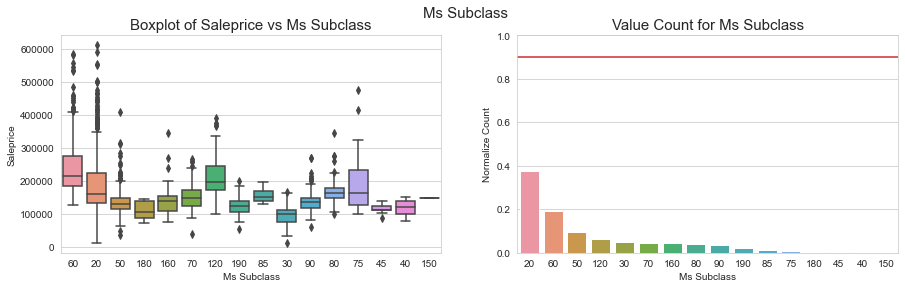

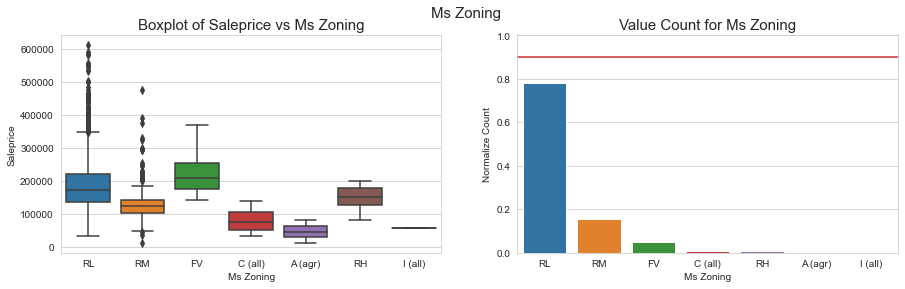

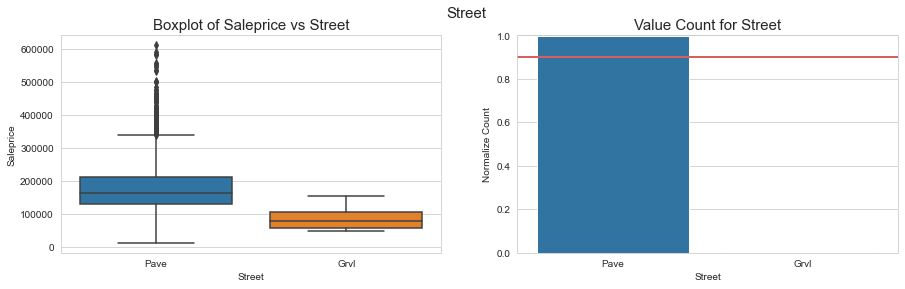

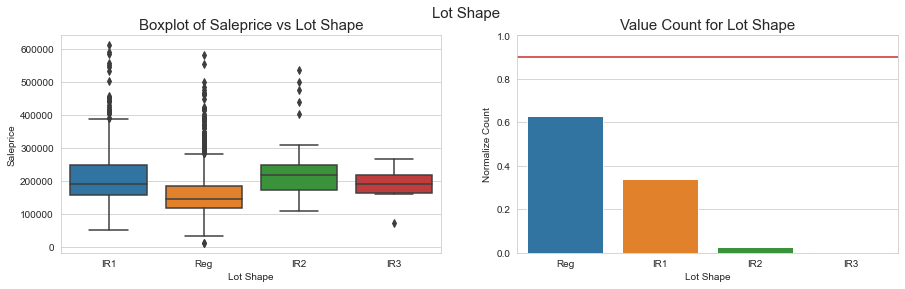

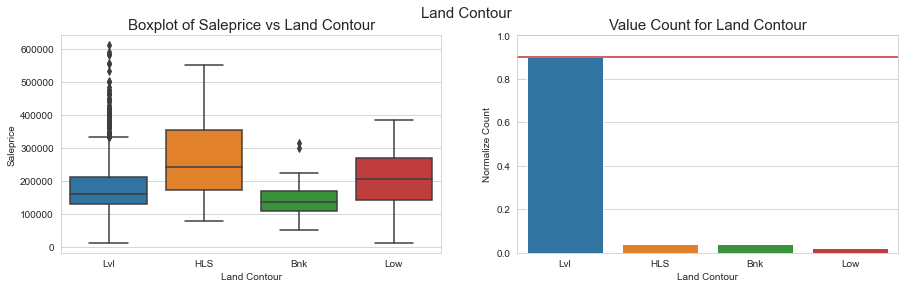

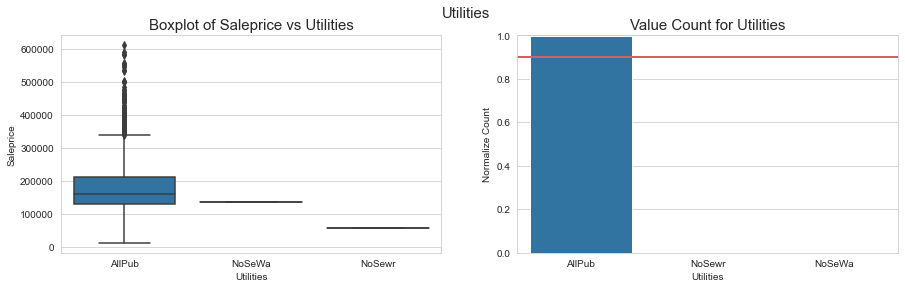

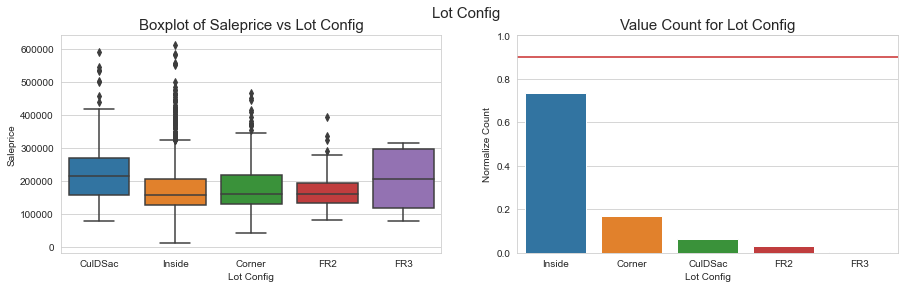

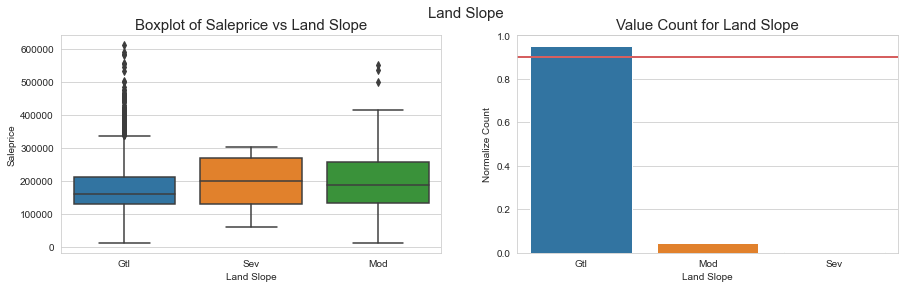

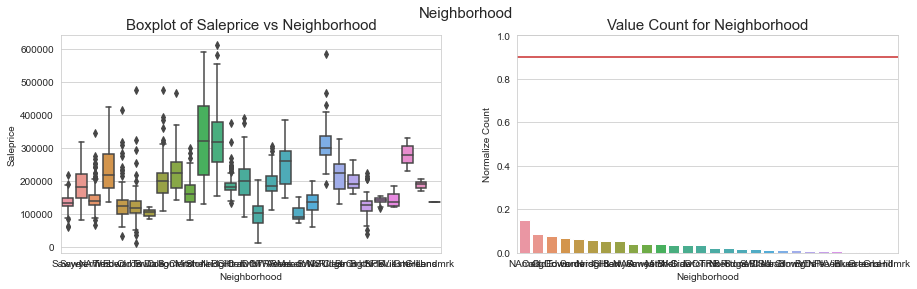

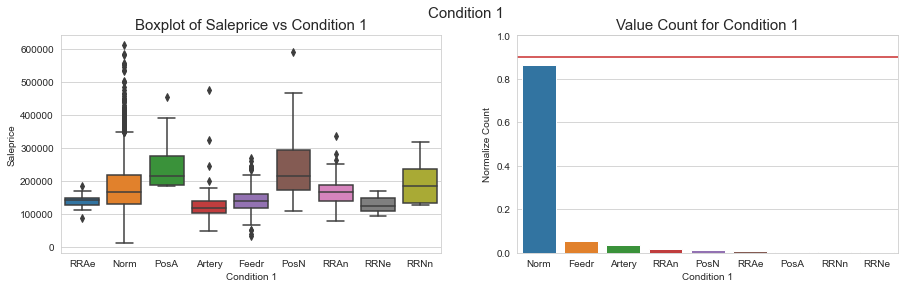

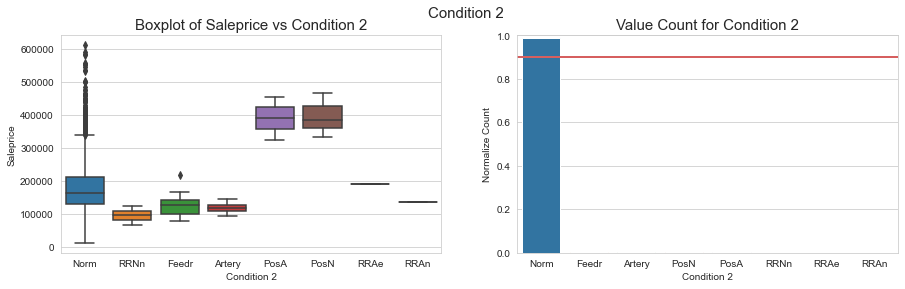

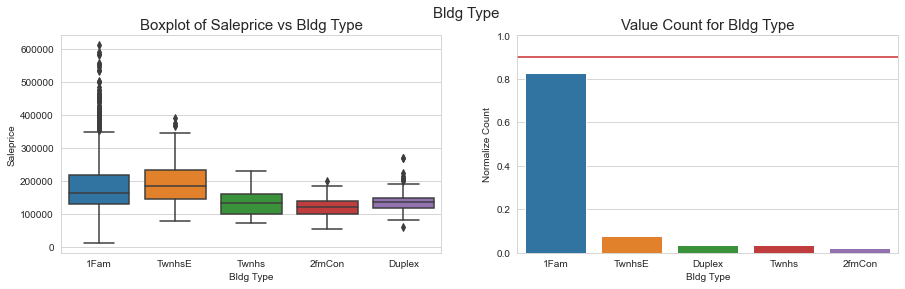

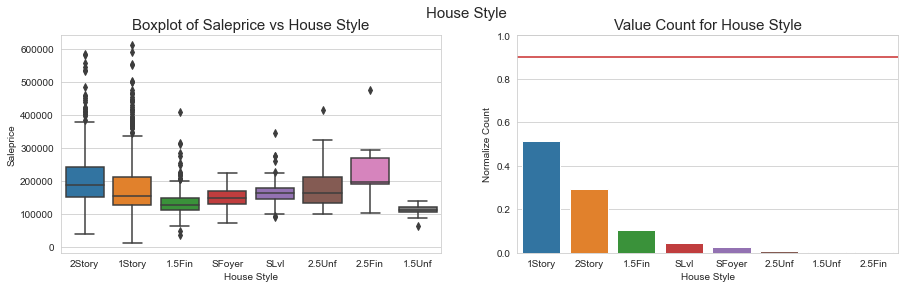

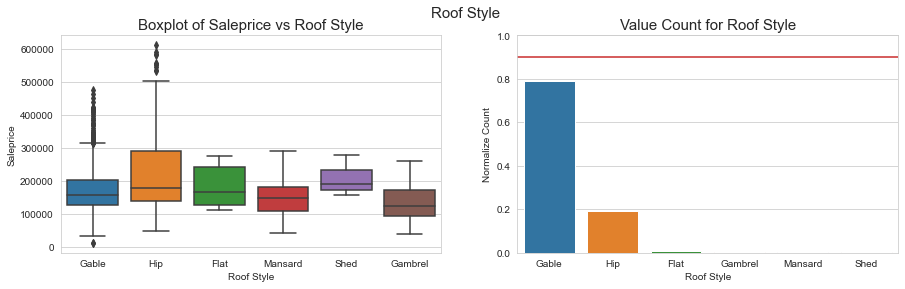

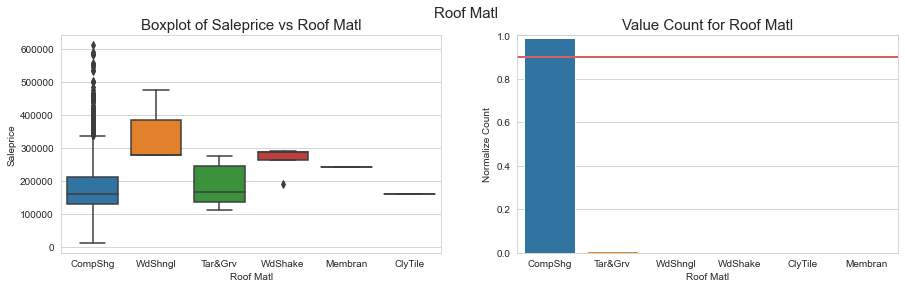

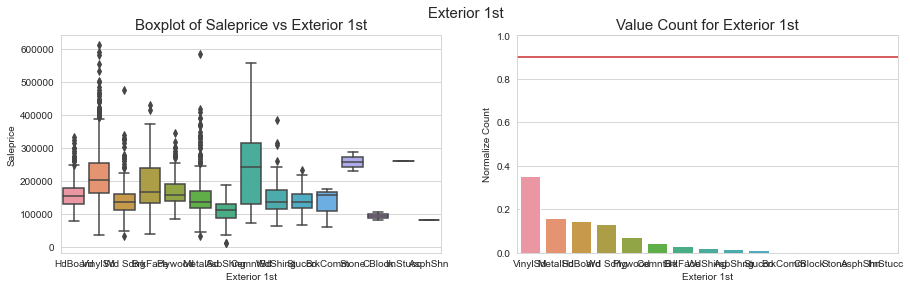

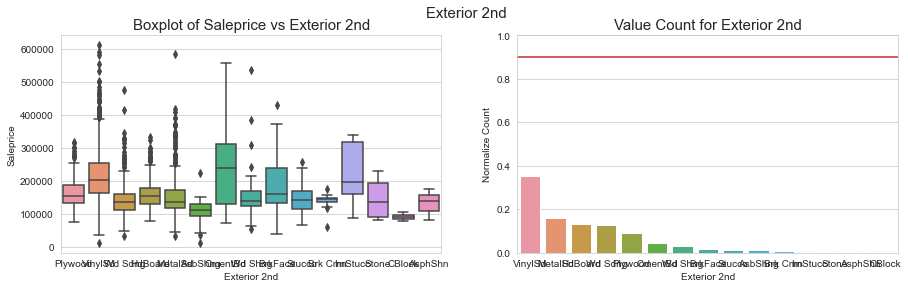

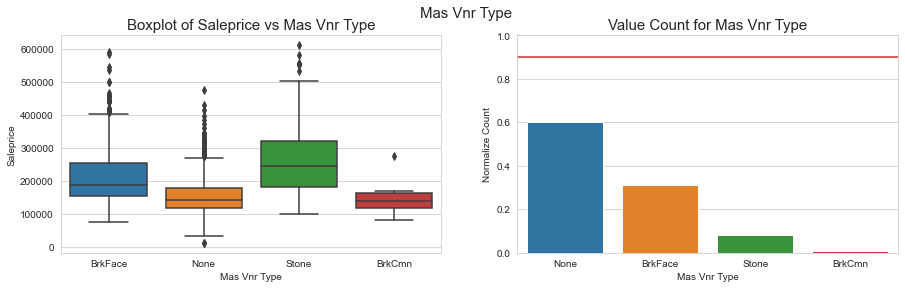

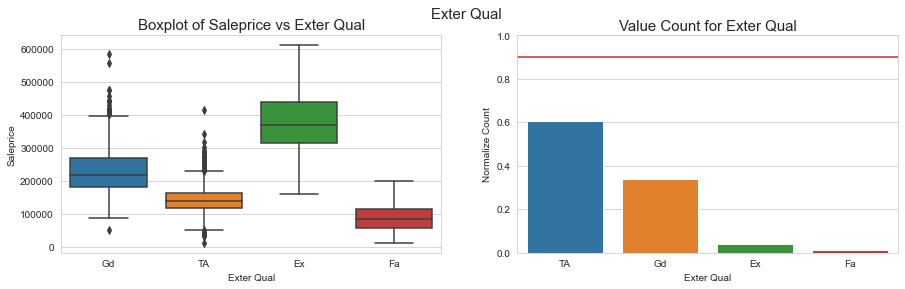

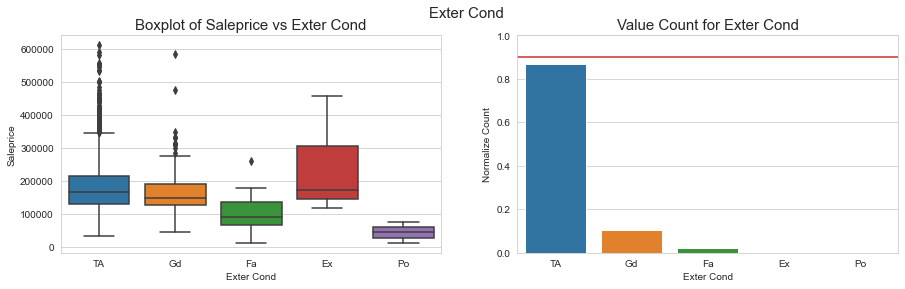

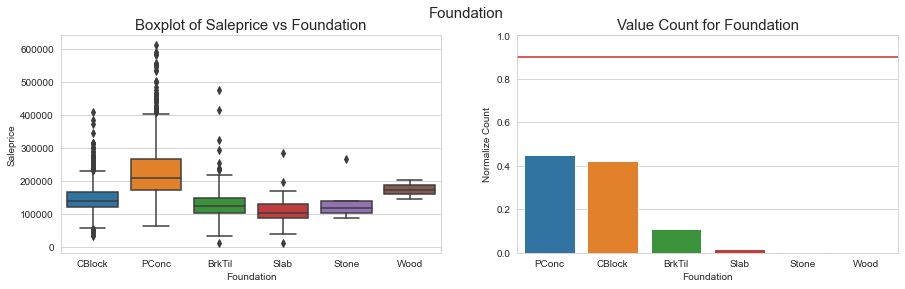

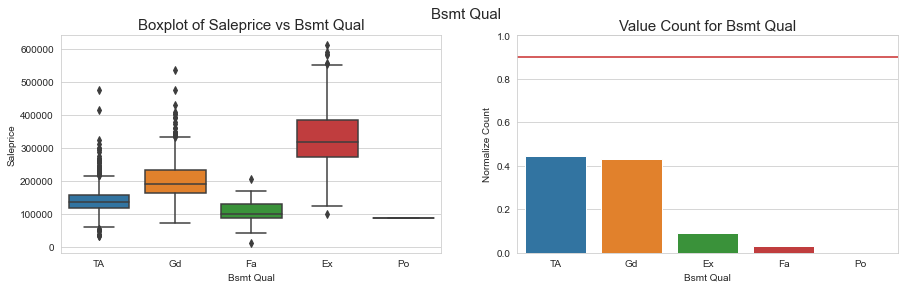

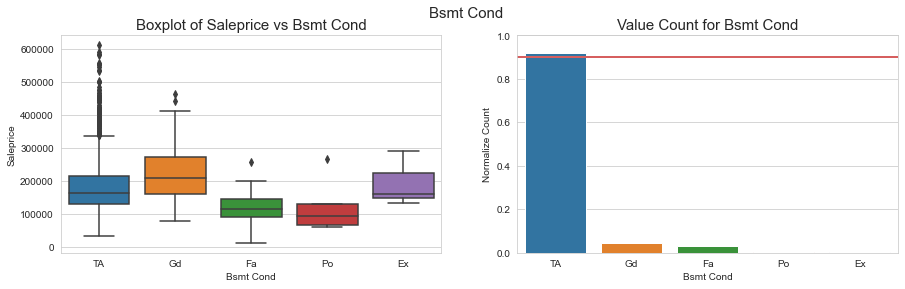

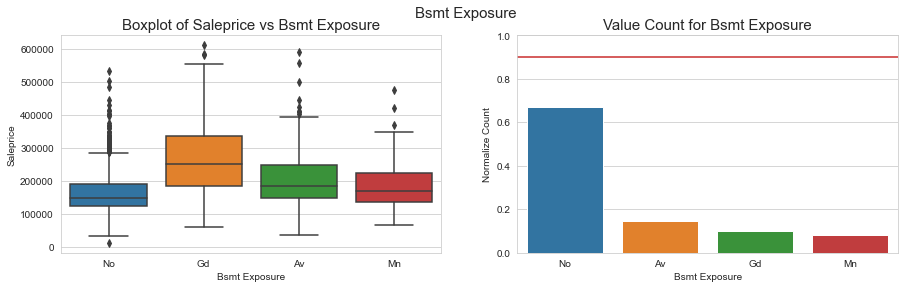

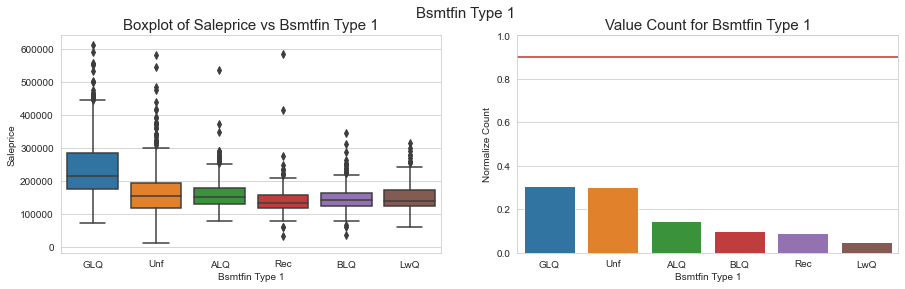

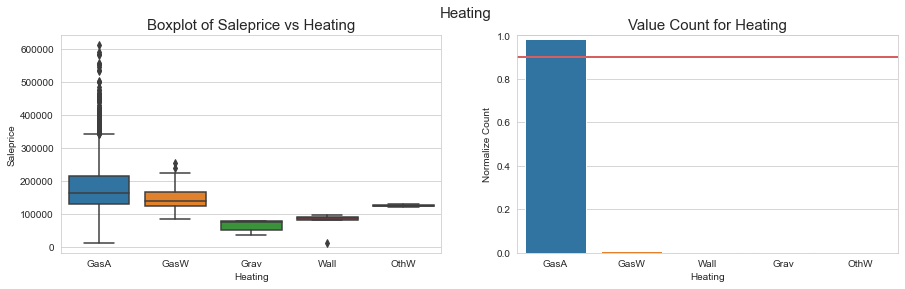

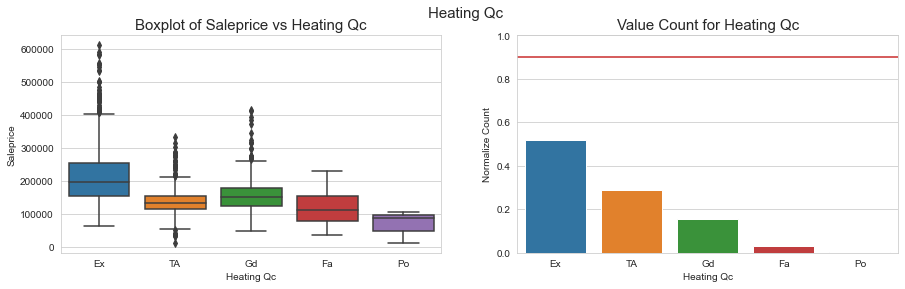

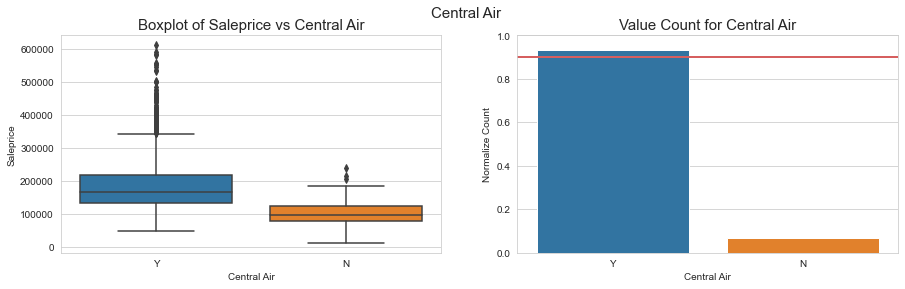

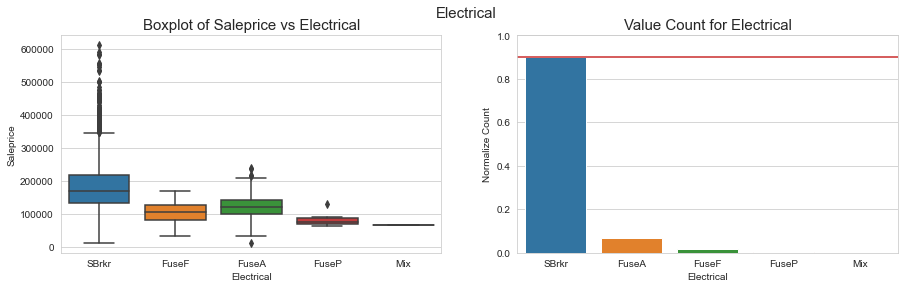

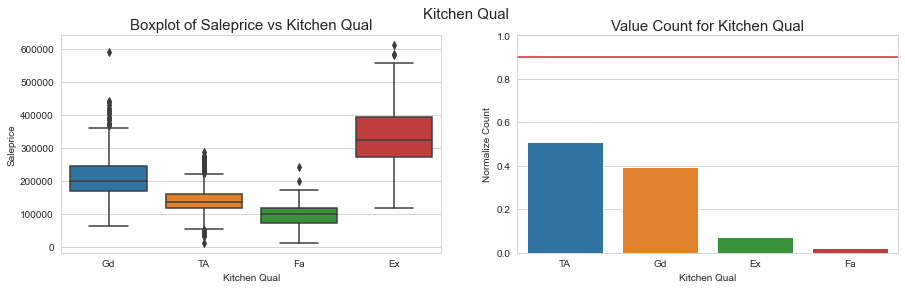

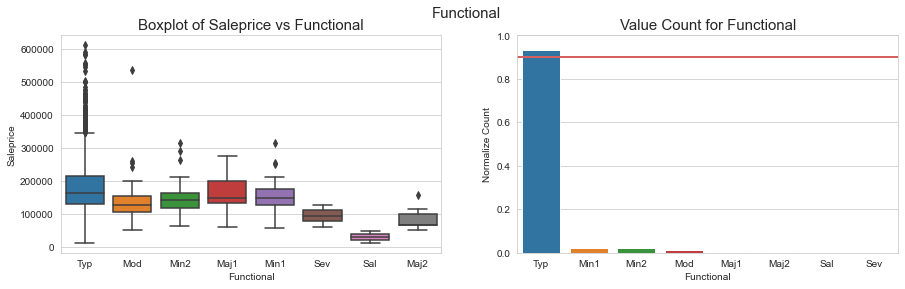

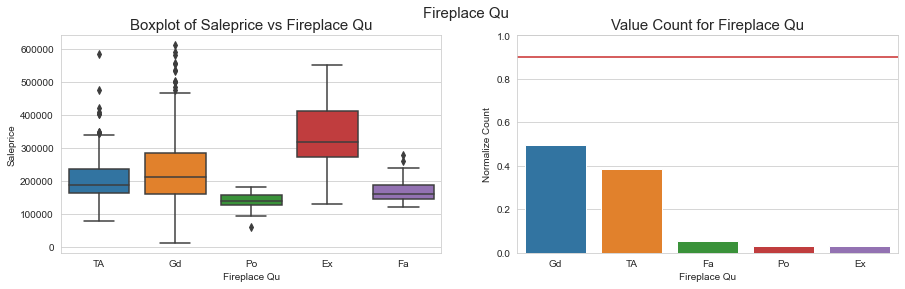

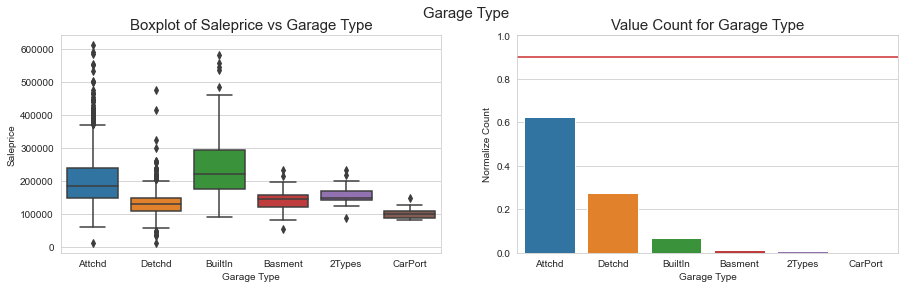

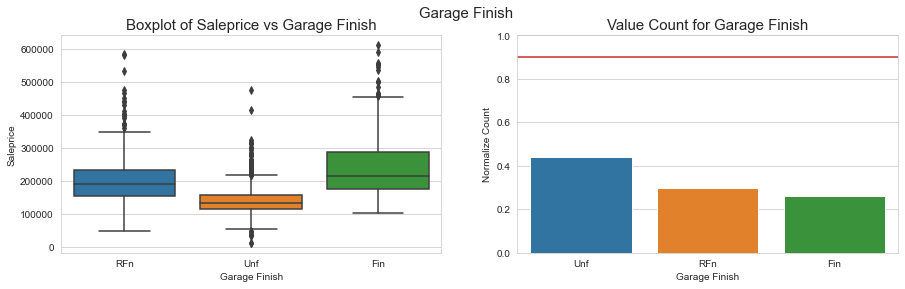

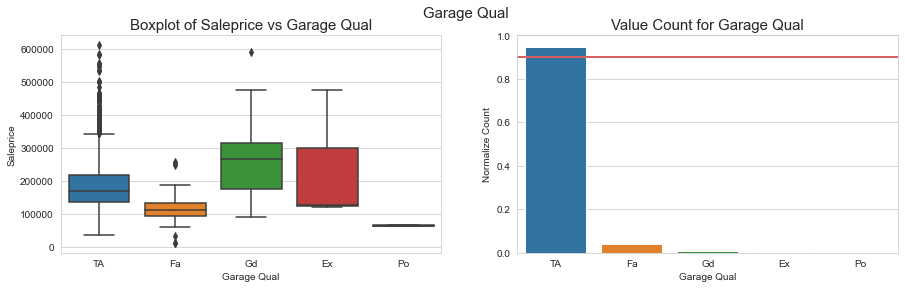

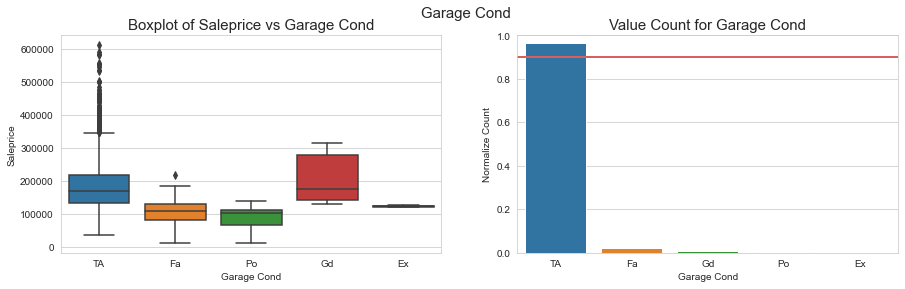

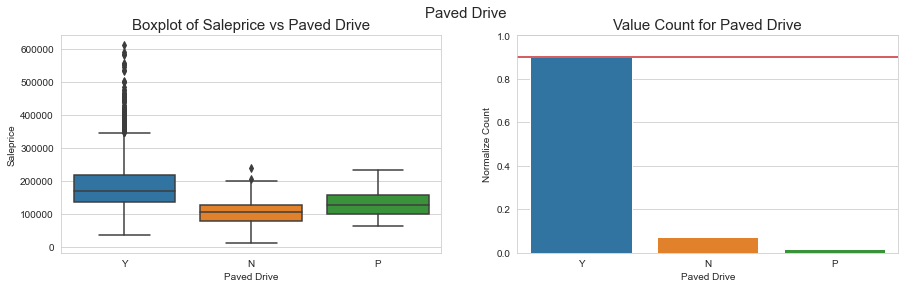

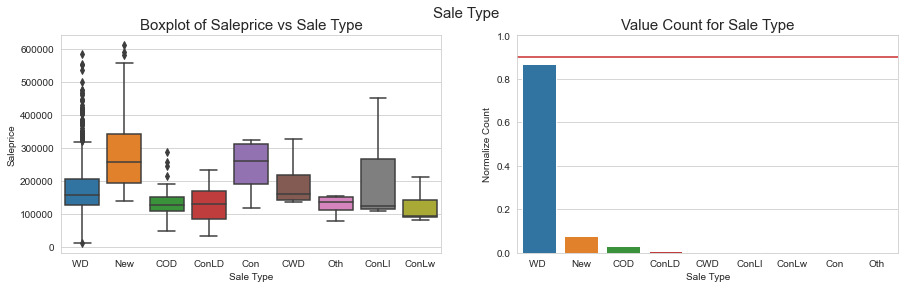

In [38]:
# for each of the categorical features:
# 1. plot a histogram to see the percentage of values (is any single value taking up a huge percentage)
# 2. print the number of null values in the feature
for col in df_train_cat.columns:

    if col != 'saleprice':
        
        fig, ax = plt.subplots(ncols = 2, figsize = (15, 4))
        
        plt.suptitle(f'{print_col(col)}', fontsize = 15)
        
        sns.boxplot(x=df_train_cat[col], y=df_train_cat['saleprice'], ax = ax[0])
        ax[0].set_title(f'Boxplot of Saleprice vs {print_col(col)}', fontsize = 15)
        ax[0].set_xlabel(f'{print_col(col)}')
        ax[0].set_ylabel('Saleprice')
        ax[1].set_ylim(0,650000)
        
        valuecount = df_train_cat[col].value_counts(normalize=True)
        sns.barplot(x=valuecount.index, y=valuecount, ax = ax[1])
        ax[1].axhline(y=0.9,linewidth=2, color='r')
        ax[1].set_title(f'Value Count for {print_col(col)}', fontsize = 15)
        ax[1].set_xlabel(f'{print_col(col)}')
        ax[1].set_ylabel('Normalize Count')
        ax[1].set_ylim(0,1)
        
        plt.tight_layout
        plt.show()

### Features with High Proportion of Single Value
From the barplots of the value counts above, the features street, utilities, land_slope, condition_2, roof_matl, bsmt_cond, heating, central_air, functional, garage_qual, garage_cond have been identified to have **very high proportion (more than 90%) of a single value, making them not very useful in understanding saleprice** generally. I will take a closer look at the percentage of the values.

From the boxplots above, seems that all the categorical features have some variance for saleprice. None of the features will be removed due to having low variance with saleprice at this stage.

In [39]:
# create a list of the above mentioned features
features = 'street, utilities, land_slope, condition_2, roof_matl, bsmt_cond, heating, central_air, functional, garage_qual, garage_cond'.replace(' ', '').split(',')

# for each of the features identified with high proportion of single values, print the normalized value count
for feature in features:
    print(f'Normalize value count for {print_col(feature)}')
    print(df_train_cat[feature].value_counts(normalize=True))
    print('\n')

Normalize value count for Street
Pave    0.996587
Grvl    0.003413
Name: street, dtype: float64


Normalize value count for Utilities
AllPub    0.999025
NoSewr    0.000488
NoSeWa    0.000488
Name: utilities, dtype: float64


Normalize value count for Land Slope
Gtl    0.952218
Mod    0.042906
Sev    0.004876
Name: land_slope, dtype: float64


Normalize value count for Condition 2
Norm      0.987323
Feedr     0.005363
Artery    0.002438
PosN      0.001463
PosA      0.001463
RRNn      0.000975
RRAe      0.000488
RRAn      0.000488
Name: condition_2, dtype: float64


Normalize value count for Roof Matl
CompShg    0.987323
Tar&Grv    0.007314
WdShngl    0.002438
WdShake    0.001950
ClyTile    0.000488
Membran    0.000488
Name: roof_matl, dtype: float64


Normalize value count for Bsmt Cond
TA    0.918838
Gd    0.044589
Fa    0.032565
Po    0.002505
Ex    0.001503
Name: bsmt_cond, dtype: float64


Normalize value count for Heating
GasA    0.983910
GasW    0.009751
Wall    0.002925
Grav    0

#### Drop columns - High proportion of single value
From the barplot and value_counts above, the features, street, utilities, condition_2, roof_matl, heating, have **single values which takes up a more than 98% of all the observations**. Such features will **not be useful in the general understanding of the saleprice** as these features lack variance for the model to learn from. 

These features will be dropped.

For the other features identified, we will pass them to the model, in case we drop any potentially useful feature.

In [40]:
# dropping the identified features
cols_to_drop = 'street, utilities, condition_2, roof_matl, heating'.replace(' ', '').split(',')
drop_features('high_proportion_of_single_value', cols_to_drop, df_train_cat)

In [41]:
# check the features dropped and reasons associated 
features_to_be_dropped

{'high_null_pct': ['pool_qc', 'misc_feature', 'alley', 'fence'],
 'high_zero_pct': ['bsmtfin_sf_2',
  'bsmt_half_bath',
  'low_qual_fin_sf',
  'enclosed_porch',
  '3ssn_porch',
  'screen_porch',
  'pool_area',
  'misc_val'],
 'IDs': 'id',
 'high_pct_of_single_value': ['bsmtfin_type_2'],
 'sum_high_corr_to_gr_liv_area': ['1st_flr_sf', '2nd_flr_sf'],
 'high_pairwise_collinearity': ['garage_yr_blt',
  'totrms_abvgrd',
  'garage_cars'],
 'interaction_feature': ['year_built', 'year_remod/add'],
 'low_corr_to_saleprice': ['bsmt_unf_sf',
  'bsmt_full_bath',
  'bedroom_abvgr',
  'yr_sold',
  'mo_sold'],
 'high_proportion_of_single_value': ['street',
  'utilities',
  'condition_2',
  'roof_matl',
  'heating']}

# Preprocessing Datasets

## 1. Null Values

In [42]:
# find all features with null values in the remaining features
null_cols = [col_name for col_name in df_train.columns if df_train[col_name].isnull().any()]

# show the number of null values in these features (sorted)
df_train[null_cols].isnull().sum().sort_values(ascending=False)

fireplace_qu      1000
lot_frontage       330
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
garage_area          1
total_bsmt_sf        1
bsmtfin_sf_1         1
dtype: int64

### Reference to Data Dictionary
According to the data dictionary:
1. If the value is NaN for fireplace_qu: it means that there is **no fireplace**.
2. If the value is NaN for garage_cond, garage_qual, garage_finish, garage_type: it means that there is **no garage**.
2. If the value is NaN for bsmt_exposure, bsmt_cond, bsmt_qual, bsmtfin_type_1: it means that there is **no basement**. 
3. If the value is Nan for mas_vnr_type (and mas_vnr_area, which has the same number of null values): it means that there is **no masonry veneer**. 

Hence these columns will be imputed with 'None' or 0.

This then leave lot_frontage, garage_area, total_bsmt_sf and bsmtfin_sf_1 to be explored.

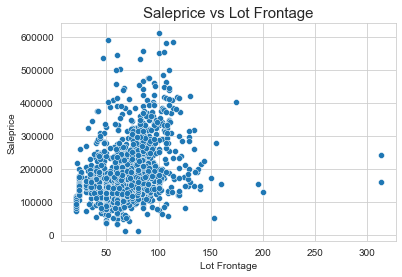

In [43]:
# plot the scatterplot of saleprice vs lot frontage to see how imputation should be done
sns.scatterplot(x=df_train['lot_frontage'], y=df_train['saleprice'])
plt.title('Saleprice vs Lot Frontage', fontsize = 15)
plt.ylabel('Saleprice')
plt.xlabel('Lot Frontage')
plt.show()

It is hard to be able to infer the missing value for lot_frontage. It is unlikely for the linear feet of street connected to the property to be zero. Further supported by the fact that there are no 0 values in the available dataset. 

I will fill the null values for this feature with the **mean of available lot_frontage values**.

In [44]:
# look at the information of the single row with null value for bsmtfin_sf_1
# as there are many features, this will only show features related to basement
df_train[(df_train['bsmtfin_sf_1'].isnull())][[col for col in df_train.columns if 'bsmt' in col]]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,total_bsmt_sf
1327,NaN,NaN,NaN,NaN,NaN,NaN


The row with null value for bsmtfin_sf_1 is also the row with null value for total_bsmt_sf. Looking at this row, values for all basement related features are also null. Hence, it is safe to assume that there is no basement at this property and perhaps the null value is due to error in filling in. 

The two null values will be imputed with 0.

In [45]:
# look at the information for the row with null for garage_area
# as there are many features, this will only show features related to garage
df_train[(df_train['garage_area'].isnull())][[col for col in df_train.columns if 'garage' in col]]

,garage_type,garage_finish,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN


The row that has null value for garage area interestingly has a value for garage type, where the garage type is detached. Values for all other garage related information is NaN.

As we are unable to ascertain whether there is a detached garage at this property or not, in order to prevent feeding inaccurate information into the model, the data for this property will be dropped.

In [46]:
# drop the row identified above
df_train.drop(index=df_train[(df_train['garage_cond'].isnull()) & (df_train['garage_type'].notnull())].index, inplace=True)

In [47]:
# check the datatype of the columns with null values to determine whether to impute with none or 0.
df_train[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lot_frontage    1720 non-null   float64
 1   mas_vnr_type    2028 non-null   object 
 2   mas_vnr_area    2028 non-null   float64
 3   bsmt_qual       1995 non-null   object 
 4   bsmt_cond       1995 non-null   object 
 5   bsmt_exposure   1992 non-null   object 
 6   bsmtfin_type_1  1995 non-null   object 
 7   bsmtfin_sf_1    2049 non-null   float64
 8   total_bsmt_sf   2049 non-null   float64
 9   fireplace_qu    1051 non-null   object 
 10  garage_type     1937 non-null   object 
 11  garage_finish   1937 non-null   object 
 12  garage_area     2050 non-null   float64
 13  garage_qual     1937 non-null   object 
 14  garage_cond     1937 non-null   object 
dtypes: float64(5), object(10)
memory usage: 256.2+ KB


### Imputing Null Values

In [48]:
# find the mean of lot frontage
lot_frontage_mean = df_train['lot_frontage'].mean()
# impute the null values of lot_frontage with the mean
df_train['lot_frontage'] = df_train['lot_frontage'].fillna(lot_frontage_mean)

# impute all categorical features with null values with 'none'
for col in ['mas_vnr_type', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',  'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond']:
    df_train[col] = df_train[col].fillna('none')

# impute all numerical features with null values with 0
for col in ['mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf']:
    df_train[col] = df_train[col].fillna(0)

In [49]:
# check if there is any more null values
df_train[null_cols].isnull().sum()

lot_frontage      0
mas_vnr_type      0
mas_vnr_area      0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
total_bsmt_sf     0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_area       0
garage_qual       0
garage_cond       0
dtype: int64

## 2. Outliers
As the numerical values will be scaled for regularization, it is important to ensure that outliers are removed to ensure that the scale used for standardizing is appropriate.

In [50]:
# find all numerical features in the remaining features
num_col = df_train.select_dtypes(include=['int64', 'float64']).columns

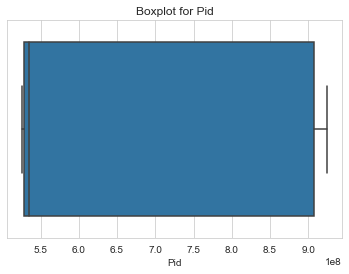

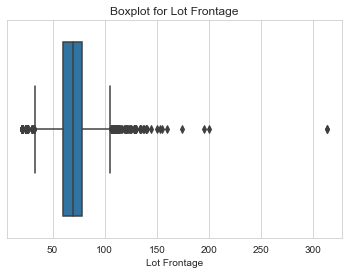

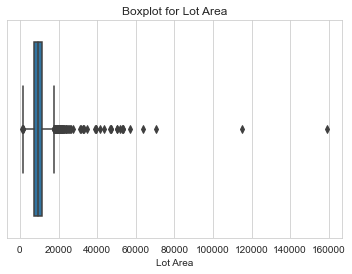

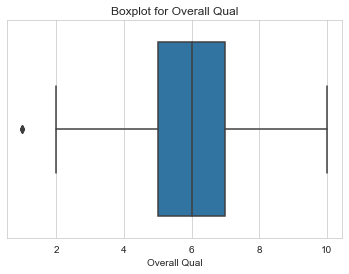

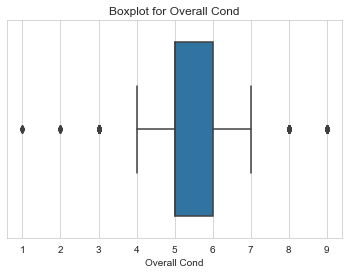

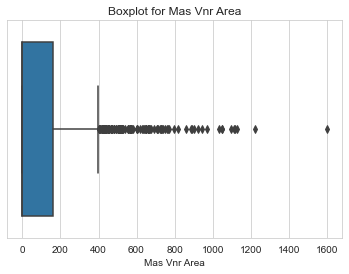

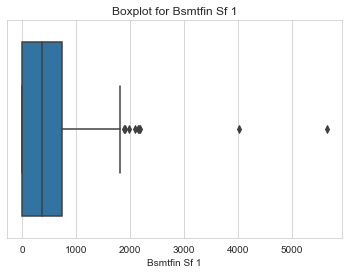

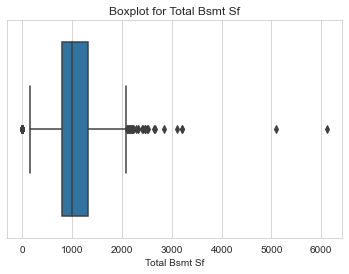

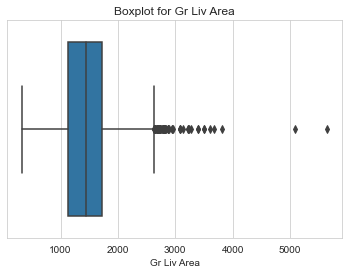

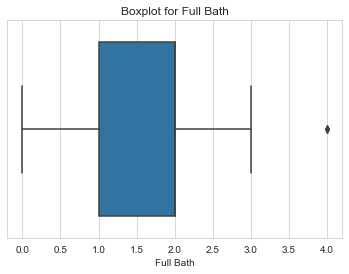

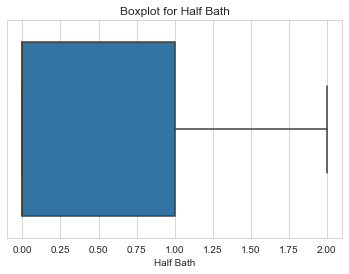

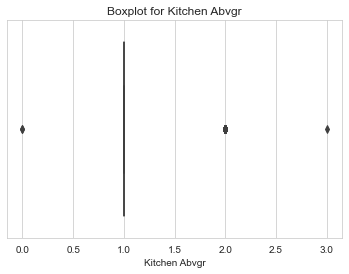

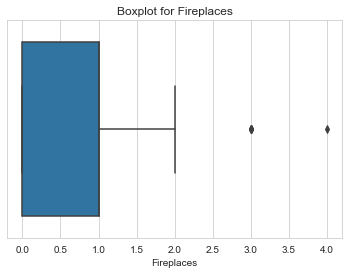

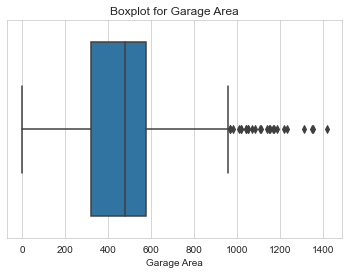

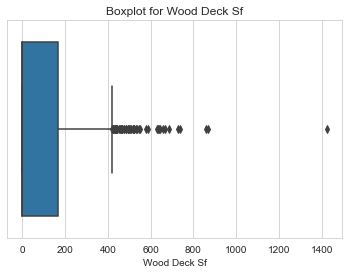

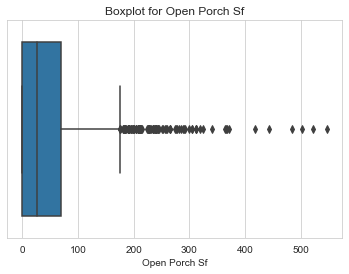

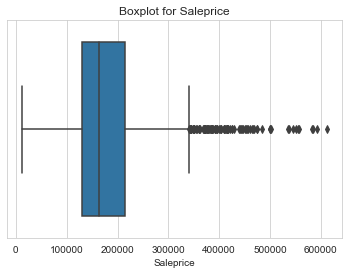

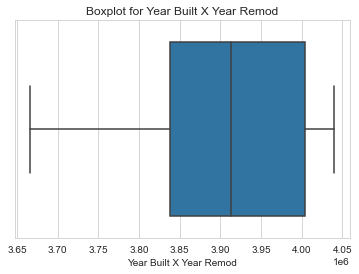

In [51]:
# print a boxplot to check for outliers for all numerical columns
for col in num_col:
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot for {print_col(col)}')
    plt.xlabel(f'{print_col(col)}')
    plt.show()

To identify the outliers, in order to prevent dropping too many rows, I will only drop datapoints which are significantly higher than the rest of the dataset. These are:
1. lot_frontage > 300
2. lot_area > 100,000
3. mas_vnr_area > 1500
4. bsmtfin_sf_1 > 4000
5. total_bsmt_sf > 5000
6. wood_deck_sf > 1400

In [52]:
# the datapoints identified above
outliers = [['lot_frontage', 300], ['lot_area', 100000], ['mas_vnr_area', 1500], 
            ["bsmtfin_sf_1", 4000], ['total_bsmt_sf', 5000], ['gr_liv_area', 5000], ['wood_deck_sf', 1400]]

# check the number of datapoints in the features and upperlimit that I have identified
# this is to ensure that not too many datapoints are at the same location
for feature, upperlimit in outliers:
    print(f'Feature "{feature}" has {len(df_train[df_train[feature]>upperlimit])} outliers')

Feature "lot_frontage" has 2 outliers
Feature "lot_area" has 2 outliers
Feature "mas_vnr_area" has 1 outliers
Feature "bsmtfin_sf_1" has 2 outliers
Feature "total_bsmt_sf" has 2 outliers
Feature "gr_liv_area" has 2 outliers
Feature "wood_deck_sf" has 1 outliers


There are only 1 or 2 outliers higher than the upperlimit found. It is safe to assume that these are outlier values and drop them.

In [53]:
# dropping all the identified outliers based on feature and upperlimit
for feature, upperlimit in outliers:
    df_train.drop(index=df_train[df_train[feature] > upperlimit].index, inplace=True)

## 3. Categorical Data
This is to encode categorical data into suitable numerical format that can be understood by the model.

1. Norminal data has no order and will need to be one-hot encoded.
2. Ordinal data has order and will need to be ordinally encoded.

In [54]:
# as encoding categorical data will create new columns (due to one-hot encoding), 
# I will make a list of the features that will be included in the test dataset
features_to_be_used = df_train.columns

In [55]:
# find all categorical features in the dataset
cat_col = df_train.select_dtypes(include='object').columns

# show the dataset to check against the data dictionary to determine if they are norminal or ordinal
cat_col

Index(['ms_subclass', 'ms_zoning', 'lot_shape', 'land_contour', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'bldg_type', 'house_style',
       'roof_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond',
       'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc', 'central_air',
       'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'sale_type'],
      dtype='object')

In [56]:
# all norminal features - the classes has no order and needs to be one-hot encoded
norminal_cat = ['ms_subclass', 'ms_zoning', 'land_contour', 'lot_config', 'neighborhood',
                'condition_1', 'bldg_type', 'house_style','roof_style', 'exterior_1st',
                'exterior_2nd', 'mas_vnr_type', 'foundation', 'electrical', 'functional',
                'garage_type', 'sale_type']

# all ordinal features - the classes has specific order and needs to be ordinally encoded
ordinal_cat = ['lot_shape', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual',
               'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc', 'kitchen_qual',
               'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive']

# binary feature - the class only has yes and no which can be encoded into 1 and 0
binary_cat = ['central_air']

In [57]:
# mapping the Y to 1 and N to 0 for central_air
df_train['central_air'] = df_train['central_air'].map({"Y" : 1, "N" : 0})

In [58]:
# creating a dictionary with the key as the feature name and the value as the ordered list of feature's classes
ordinal_cat_dict = {'lot_shape': ['IR3', 'IR2', 'IR1', 'Reg'],
                    'land_slope': ['Sev', 'Mod', 'Gtl'], 
                    'exter_qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'exter_cond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'bsmt_qual': ['none', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'bsmt_cond': ['none', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'bsmt_exposure': ['none', 'No', 'Mn', 'Av', 'Gd'], 
                    'bsmtfin_type_1': ['none', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
                    'heating_qc': ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'kitchen_qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'fireplace_qu': ['none', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'garage_finish': ['none', 'Unf', 'RFn', 'Fin'], 
                    'garage_qual': ['none', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'garage_cond': ['none', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                    'paved_drive': ['N', 'P', 'Y']
                   }

# for each of the feature name and order classes pair, ordinally encode the feature using OrdinalEncoder
for col, categories_list in ordinal_cat_dict.items():
    ord_enc = OrdinalEncoder(categories = [categories_list])
    df_train[col] = ord_enc.fit_transform(df_train[col].values.reshape(-1,1))

# check that all ordinal features has been converted to numerical format
df_train[ordinal_cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lot_shape       2043 non-null   float64
 1   land_slope      2043 non-null   float64
 2   exter_qual      2043 non-null   float64
 3   exter_cond      2043 non-null   float64
 4   bsmt_qual       2043 non-null   float64
 5   bsmt_cond       2043 non-null   float64
 6   bsmt_exposure   2043 non-null   float64
 7   bsmtfin_type_1  2043 non-null   float64
 8   heating_qc      2043 non-null   float64
 9   kitchen_qual    2043 non-null   float64
 10  fireplace_qu    2043 non-null   float64
 11  garage_finish   2043 non-null   float64
 12  garage_qual     2043 non-null   float64
 13  garage_cond     2043 non-null   float64
 14  paved_drive     2043 non-null   float64
dtypes: float64(15)
memory usage: 255.4 KB


In [59]:
# use OneHotEncoder to encode the norminal features, the same transformer will be used to transform the test dataset later
# as we are unsure if there will be new values in future dataset, unknowns from testing dataset will be ignore
ohenc = OneHotEncoder(handle_unknown = 'ignore')

# fit and transform the norminal features
df_train_ohenc = ohenc.fit_transform(df_train[norminal_cat]).toarray()

# turn the transformed array into a dataframe
df_train_ohenc = pd.DataFrame(df_train_ohenc, columns = ohenc.get_feature_names(df_train[norminal_cat].columns), index = df_train[norminal_cat].index)

# merge the dataframe with the original dataset
df_train = pd.concat([df_train.drop(columns = norminal_cat), df_train_ohenc], axis = 1)

In [60]:
# check all features are in numerical format
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Columns: 192 entries, pid to sale_type_WD 
dtypes: float64(178), int64(14)
memory usage: 3.0 MB


## 4. Preprocess Test Dataset

Preprocess the test dataset similar to what has been done for the training dataset.

In [61]:
# make a copy of the test dataset
df_test = test.copy()

# rename the columns similar to what has been done for the training dataset
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

# create the interaction term for year_built and year_remod
df_test['year_built_x_year_remod'] = df_test['year_built'] * df_test['year_remod/add']

# change ms_subclass into object (categorical) type as opposed to numerical type
df_test['ms_subclass']= df_test['ms_subclass'].astype(str)

# extract only the relevant features to be used
# saleprice has to be dropped as there is no saleprice information in the test dataset
df_test = df_test[features_to_be_used.drop('saleprice')]

In [62]:
# impute any potential null values in the test dataset
# values to be imputed are the same as the training dataset

df_test.loc[:,'lot_frontage'] = df_test['lot_frontage'].fillna(lot_frontage_mean)

for col in ['mas_vnr_type', 'bsmt_qual','bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',  'fireplace_qu', 'garage_type', 'garage_finish','garage_qual', 'garage_cond']:
    df_test.loc[:,col] = df_test[col].fillna('none')
    
for col in ['mas_vnr_area','bsmtfin_sf_1','total_bsmt_sf']:
    df_test.loc[:,col] = df_test[col].fillna(0)

In [63]:
# map the central air data: Y to 1, N to 0
df_test.loc[:,'central_air'] = df_test['central_air'].map({"Y" : 1, "N" : 0})

In [64]:
# perform ordinal encoding on the test set using the same feature name and order classes pair
for col, categories_list in ordinal_cat_dict.items():
    ord_enc = OrdinalEncoder(categories = [categories_list])
    df_test.loc[:,col] = ord_enc.fit_transform(df_test[col].values.reshape(-1,1))

In [65]:
# when running one-hot encoder, it is found that electrical has a null value
# as the training set did not have any null value for electrical, this has not been addressed
# I will check the value count for the most frequent value and impute with that
df_test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [66]:
# impute the null value for electrical with the most frequent value - SBrkr
df_test.loc[df_test['electrical'].isnull(),'electrical'] = 'SBrkr'

In [67]:
# transform (no more fitting!) the norminal featuures in the test dataset
df_test_ohenc = ohenc.transform(df_test[norminal_cat]).toarray()

# changing the array output into a dataframe and concatenating with the original dataframe
df_test_ohenc = pd.DataFrame(df_test_ohenc, columns = ohenc.get_feature_names(df_test[norminal_cat].columns), index = df_test[norminal_cat].index)
df_test = pd.concat([df_test.drop(columns = norminal_cat), df_test_ohenc], axis = 1)

**Save Preprocessed Files**

In [68]:
# check that the shape of the dataframe is as expected
print(f'The shape of train dataset after preprocessing: {df_train.shape}')
print(f'The shape of test dataset after preprocessing: {df_test.shape}')

The shape of train dataset after preprocessing: (2043, 192)
The shape of test dataset after preprocessing: (879, 191)


In [69]:
# save the cleaned train and test datasets to be used for modeling in the next notebook
df_train.to_csv('../datasets/train_cleaned.csv', index=False)
df_test.to_csv('../datasets/test_cleaned.csv', index=False)